In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
full_data = [train_df, test_df]

In [3]:
print(train_df.columns.values)
print(test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()
print('-----------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare     

In [7]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hocking, Mr. Richard George",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hocking, Mr. Richard George",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
# count the total row
len(train_df.index)

891

In [11]:
# 1. Pclass
train_df['Pclass'].describe()
#there is no missing value on this feature. now let check it's impact on our train set
print(train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [12]:
# 2. Name
train_df['Name'].describe()
# Name is unnacessary fill, since it  has no impact to our train set

count                             891
unique                            891
top       Hocking, Mr. Richard George
freq                                1
Name: Name, dtype: object

In [13]:
# 3. Sex
train_df['Sex'].describe()
#there is no missing value on this feature. now let check it's impact on out train set
print(train_df[['Sex', 'Survived']].groupby(['Sex']).mean())

        Survived
Sex             
female  0.742038
male    0.188908


In [14]:
# 4. Age
# We have some missing values in this feature.
# Since it a number we can fill the missing value from a random number between (mean -std) and (mean + std)
# And  we categorize age into 5 range.
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std  = dataset['Age'].std()

    dataset['Age'] = dataset['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std))
    dataset['Age'] = dataset['Age'].astype(int)

print(train_df['Age'].describe())
train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5)

print(train_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge']).mean())

count    891.000000
mean      31.928171
std       13.773505
min        0.000000
25%       22.000000
50%       32.000000
75%       41.000000
max       80.000000
Name: Age, dtype: float64
                Survived
CategoricalAge          
(-0.08, 16.0]   0.550000
(16.0, 32.0]    0.370690
(32.0, 48.0]    0.349862
(48.0, 64.0]    0.434783
(64.0, 80.0]    0.090909


In [15]:
# 5. SibSp and Parch
# With the number of siblings/spouse and the  number of children/prarents we can create a new feature class Family Size.
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

print(train_df[['FamilySize', 'Survived']].groupby(['FamilySize']).mean())

#  Let check whether they are alone in the ship or not.
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print(train_df[['IsAlone', 'Survived']].groupby(['IsAlone']).mean())

            Survived
FamilySize          
1           0.303538
2           0.552795
3           0.578431
4           0.724138
5           0.200000
6           0.136364
7           0.333333
8           0.000000
11          0.000000
         Survived
IsAlone          
0        0.505650
1        0.303538


In [16]:
# 6. Ticket
train_df['Ticket'].describe()
# The change of survive is not depent on Ticket number

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [17]:
# 7. Fare
# There is some missing value in these feature.
# And we will replace it with the median.
# Then we can categorize it into 4 ranges.
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 4)
print(train_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare']).mean())

                 Survived
CategoricalFare          
(-0.001, 7.91]   0.197309
(7.91, 14.454]   0.303571
(14.454, 31.0]   0.454955
(31.0, 512.329]  0.581081


In [18]:
# 8.Cabin

In [19]:
# 9. Embarked
# There is some missing value in these feature
# Adn we will fill with the most occurred value in this feature ('S)
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print(train_df[['Embarked', 'Survived']].groupby(['Embarked']).mean())

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


In [20]:
# Data Cleaning
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
    # Mapping Fare
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age']  = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
    
# Feature Selection: remove unnacessary field
drop_features = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'FamilySize']
train_df = train_df.drop(drop_features, axis=1)
train_df = train_df.drop(['CategoricalAge', 'CategoricalFare'], axis=1)
    
test_df_droped = test_df.drop(drop_features, axis = 1)
print (train_df.head(10))
trainingSet = train_df.values
testingSet  = test_df_droped.values

   Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone
0         0       3    1    1     0         0        0
1         1       1    0    2     3         1        0
2         1       3    0    1     1         0        1
3         1       1    0    2     3         0        0
4         0       3    1    2     1         0        1
5         0       3    1    2     1         2        1
6         0       1    1    3     3         0        1
7         0       3    1    0     2         0        0
8         1       3    0    1     1         0        0
9         1       2    0    0     2         1        0


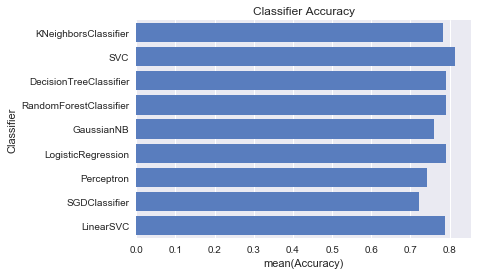

In [21]:
# Classifier Comparision
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
    Perceptron(),
    SGDClassifier(),
    LinearSVC()
]
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
X = trainingSet[0::, 1::]
y = trainingSet[0::, 0]

acc_dict = {}
for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')
                

In [22]:
#print (test_df.head(10))
model = SVC(probability=True)
model.fit(X, y)
Y_pred = model.predict(testingSet)

submission = pd.DataFrame({
     "PassengerId": test_df["PassengerId"],
     "Survived": Y_pred
 })
submission
submission.to_csv('submission.csv', index=False)